In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
dataset = pd.read_csv('data/student.csv')

In [12]:
dataset.shape

(1000, 3)

In [5]:
dataset.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [6]:
math = dataset['Math'].values
read = dataset['Reading'].values
write = dataset['Writing'].values

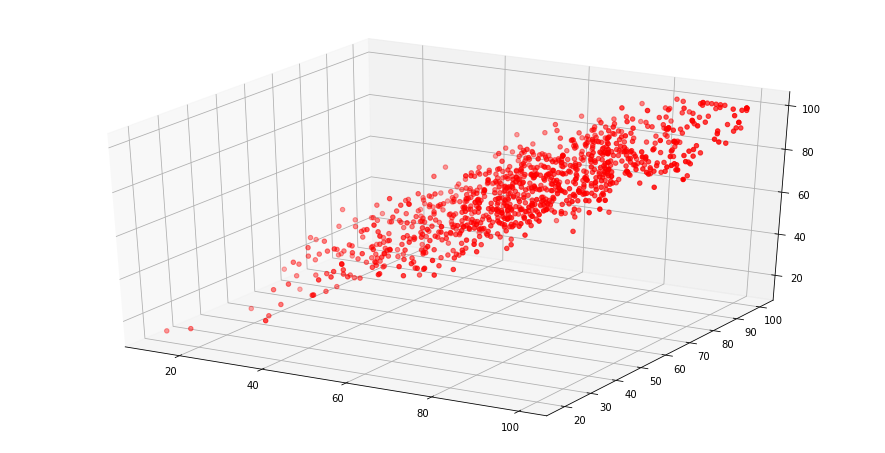

In [11]:
fig = plt.figure(figsize=(12,6))
ax = Axes3D(fig)
ax.scatter(math,read,write,color='r')

In [13]:
n = len(math)
X0 = np.ones(n)
X = np.array([X0,math,read]).T
y = np.array(write)
B = np.array([0,0,0])
alpha = 0.0001

In [17]:
def cost_function(X,y,B):
    J = np.sum((X.dot(B) - y) ** 2) / (2 * n)
    return J

In [18]:
cost_function(X,y,B)

2470.1100000000001

In [19]:
def gradient_descent(X,y,B,alpha,epochs):
    cost_history = [0] * epochs
    
    for epoch in range(epochs):
        h = X.dot(B)
        loss = h - y
        gradient = X.T.dot(loss) / n
        B = B - alpha * gradient
        cost = cost_function(X,y,B)
        cost_history[epoch] = cost
    
    return B, cost_history

In [27]:
newB, cost = gradient_descent(X,y,B,alpha,1000)

In [28]:
newB

array([ 0.00274048,  0.09441056,  0.89189383])

In [29]:
len(cost)

1000

In [30]:
cost[0]

18.076027940915424

In [31]:
cost[-1]

10.500043218864263

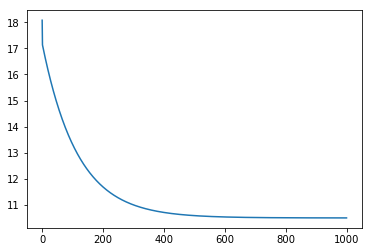

In [33]:
x = [i for i in range(1000)]
plt.plot(x,cost)

In [40]:
y_pred = X.dot(newB)

In [41]:
print(y[0:10])
print(y_pred[0:10])

[63 72 78 79 62 85 83 41 80 77]
[ 65.18322791  78.09959554  78.81268116  81.205131    62.65416869
  81.43615094  81.53056149  47.15653011  75.32950348  77.68976739]
